# How to download datasets directly from kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cjtredence","key":"0c119dccb48500492da42f3f043f85da"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                       title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                   25KB  2023-04-13 09:55:16          19306        542  1.0              
fatihb/coffee-quality-data-cqi                            Coffee Quality Data (CQI May-2023)             22KB  2023-05-12 13:06:39           1364         43  1.0              
ashpalsingh1525/imdb-movies-dataset                       IMDB movies dataset                             3MB  2023-04-28 23:18:15           2076         45  1.0              
iammustafatz/diabetes-prediction-dataset                  Diabetes prediction dataset                   734KB  2023-04-0

# Q-1
    Imagine you have a dataset where you have different Instagram features
    like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
    to predict the number of likes and Time Since posted and the rest of the features are
    your input features. Now you have to build a model which can predict the
    number of likes and Time Since posted.
    Dataset This is the Dataset You can use this dataset for this question
[Data Set](https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach)


In [ ]:
import kaggle
! kaggle datasets download -d rxsraghavagrawal/instagram-reach

  0% 0.00/16.9k [00:00<?, ?B/s]
100% 16.9k/16.9k [00:00<00:00, 28.5MB/s]


In [ ]:
! unzip instagram-reach.zip

Archive:  instagram-reach.zip
  inflating: instagram_reach.csv     


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import re
# Load the dataset using pandas
dfq1 = pd.read_csv('instagram_reach.csv')
dfq1.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [ ]:
dfq1.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [ ]:
dfq1['Time since posted'][0]

'11 hours'

In [ ]:
# removing hours and typecasting to int
dfq1['Time since posted'] = dfq1['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))
dfq1.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [ ]:
len(dfq1['Caption'][0])

149

In [ ]:
# There is a chance that number of likes and followers might affect based on size of the captions, 
# so we can find the length of the caption and use it as an additional feature
dfq1['caption length'] = dfq1['Caption'].str.len()
dfq1.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,caption length
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139,149.0
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23,454.0
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25,704.0
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49,4.0
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30,322.0


In [ ]:
dfq1.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
caption length       6
dtype: int64

In [ ]:
dfq1['caption length'] = dfq1['caption length'].fillna(0)

R-squared Score of Linear Regrssion: 0.7932596750879275
R-squared Score of gradient boosting Regrssion: 0.6508807099656329


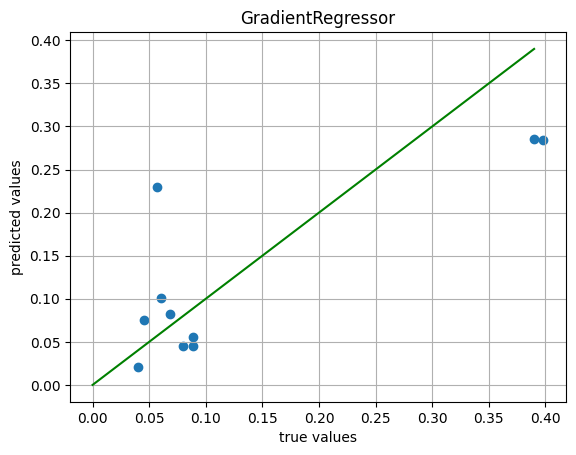

In [ ]:
# Predicting No of likes

# gathering features
featureVector = np.array(dfq1[['Followers', 'Time since posted','caption length']], dtype = 'float32')
targets = np.array(dfq1['Likes'], dtype = 'float32')
maxValLikes = max(targets)
# print('Max value of target is {}'.format(maxValLikes))
#diving targets by max values 
targets = targets/maxValLikes

# doing standard stuff now
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)



# Create a linear regression model
lr = LinearRegression()
# Fit the model on your training data
lr.fit(xTrain, yTrain)
# Make predictions on the test data
y_pred_lr = lr.predict(xTest)
# Calculate the R-squared score
r2 = r2_score(yTest, y_pred_lr)
# Print the R-squared score
print("R-squared Score of Linear Regrssion:", r2)


gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

# doing Some Benchmarks
y_pred_gbr = gbr.predict(xTest)
# Calculate the R-squared score
r2 = r2_score(yTest, y_pred_gbr)
# Print the R-squared score
print("R-squared Score of gradient boosting Regrssion:", r2)

plt.scatter(yTest, y_pred_gbr)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

R-squared Score of Linear Regrssion: 0.4017321718565251
R-squared Score of gradient boosting Regrssion: 0.35977628227953984


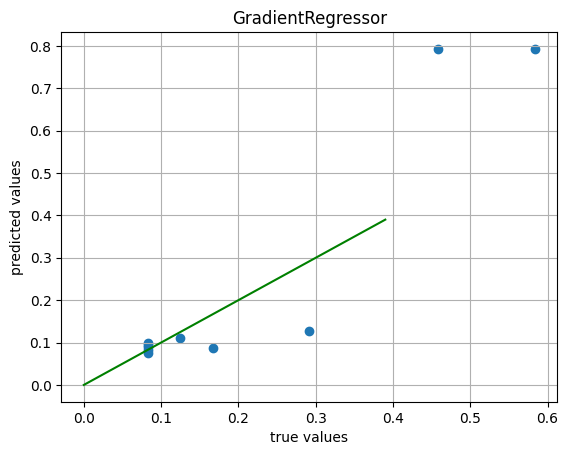

In [ ]:
# Predicting No of Time since posted

# gathering features
featureVector = np.array(dfq1[['Followers', 'Likes','caption length']], dtype = 'float32')
targets = np.array(dfq1['Time since posted'], dtype = 'float32')
maxValLikes = max(targets)
# print('Max value of target is {}'.format(maxValLikes))
#diving targets by max values 
targets = targets/maxValLikes

# doing standard stuff now
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)



# Create a linear regression model
lr = LinearRegression()
# Fit the model on your training data
lr.fit(xTrain, yTrain)
# Make predictions on the test data
y_pred_lr = lr.predict(xTest)
# Calculate the R-squared score
r2 = r2_score(yTest, y_pred_lr)
# Print the R-squared score
print("R-squared Score of Linear Regrssion:", r2)


gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

# doing Some Benchmarks
y_pred_gbr = gbr.predict(xTest)
# Calculate the R-squared score
r2 = r2_score(yTest, y_pred_gbr)
# Print the R-squared score
print("R-squared Score of gradient boosting Regrssion:", r2)

plt.scatter(yTest, y_pred_gbr)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

# Q 2
    Imagine you have a dataset where you have different features like Age ,
    Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
    different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
    any 4 different classification algorithms. Now you have to build a model which
    can classify people into different classes.
    Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
! kaggle datasets download -d ankurbajaj9/obesity-levels
! unzip obesity-levels.zip

  0% 0.00/115k [00:00<?, ?B/s]
100% 115k/115k [00:00<00:00, 72.1MB/s]
Archive:  obesity-levels.zip
  inflating: ObesityDataSet_raw_and_data_sinthetic.arff  
  inflating: ObesityDataSet_raw_and_data_sinthetic.csv  


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import re

## Import the necessary libraries:-
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset using pandas
dfq2 = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
dfq2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
dfq2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
# Preprocess the dataset
encoder = LabelEncoder()
dfq2['Gender'] = encoder.fit_transform(dfq2['Gender'])
dfq2['family_history_with_overweight'] = encoder.fit_transform(dfq2['family_history_with_overweight'])
dfq2['FAVC'] = encoder.fit_transform(dfq2['FAVC'])
dfq2['CAEC'] = encoder.fit_transform(dfq2['CAEC'])
dfq2['SMOKE'] = encoder.fit_transform(dfq2['SMOKE'])
dfq2['SCC'] = encoder.fit_transform(dfq2['SCC'])
dfq2['CALC'] = encoder.fit_transform(dfq2['CALC'])
dfq2['MTRANS'] = encoder.fit_transform(dfq2['MTRANS'])
dfq2['NObeyesdad'] = encoder.fit_transform(dfq2['NObeyesdad'])

In [ ]:
dfq2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [ ]:
# Split the dataset into features (X) and target (y)
X = dfq2.drop('NObeyesdad', axis=1)
y = dfq2['NObeyesdad']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)
# Make predictions on the test set
y_preddt = dt_clf.predict(X_test)
# Calculate the accuracy score
accuracydt = accuracy_score(y_test, y_preddt)
# Print the accuracy score
print("Accuracy score for Decision Tree Classifier:", accuracydt)

# Print classification reports for each classifier
print("Decision Tree Classifier:")
print(classification_report(y_test, dt_predictions))

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
# Logistic Regression Classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)
# Make predictions on the test set
y_predlr = lr_clf.predict(X_test)
# Calculate the accuracy score
accuracylr = accuracy_score(y_test, y_predlr)
# Print the accuracy score
print("Accuracy score for Logistic regression  Classifier:", accuracylr)

# Print classification reports for each classifier
print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_predictions))

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)
# Make predictions on the test set
y_predrf = rf_clf.predict(X_test)
# Calculate the accuracy score
accuracyrf = accuracy_score(y_test, y_predrf)
# Print the accuracy score
print("Accuracy score for Random Forest Classifier:", accuracyrf)

print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
# Support Vector Machine (SVM) Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)
# Make predictions on the test set
y_predsvm = svm_clf.predict(X_test)
# Calculate the accuracy score
accuracysvm = accuracy_score(y_test, y_predsvm)
# Print the accuracy score
print("Accuracy score for Decision SVM Classifier:", accuracysvm)

print("SVM Classifier:")
print(classification_report(y_test, svm_predictions))

Accuracy score for Decision Tree Classifier: 0.9385342789598109
Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.87      0.89      0.88        62
           2       0.95      0.92      0.94        78
           3       0.95      0.95      0.95        58
           4       1.00      1.00      1.00        63
           5       0.93      0.91      0.92        56
           6       0.96      0.94      0.95        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy score for Logistic regression  Classifier: 0.6548463356973995
Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
  

# Q 3
    Imagine you have a dataset where you have different categories of data, Now
    you need to find the most similar data to the given data by using any 4 different
    similarity algorithms. Now you have to build a model which can find the most similar
    data to the given data.
    Dataset This is the Dataset You can use this dataset for this question

# Q 4 
    Imagine you working as a sale manager now you need to predict the Revenue
    and whether that particular revenue is on the weekend or not and find the
    Informational_Duration using the Ensemble learning algorithm
  [Dataset link](https://www.kaggle.com/datasets/henrysue/online-shoppers-intention) This is the Dataset You can use this dataset for this question.

In [ ]:
! kaggle datasets download -d henrysue/online-shoppers-intention
! online-shoppers-intention.zip

  0% 0.00/252k [00:00<?, ?B/s]
100% 252k/252k [00:00<00:00, 46.0MB/s]
/bin/bash: online-shoppers-intention.zip: command not found
